<a href="https://colab.research.google.com/github/AnishaBeck/ML/blob/main/Lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install -U scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

In [ ]:
ks = pd.read_csv("/content/goals.csv")

In [ ]:
ks.head()

,serial,player_name,club,position,goals,right_foot,left_foot,headers,others,inside_area,outside_areas,penalties,match_played
0,1,Benzema,Real Madrid,Forward,15,11,1,3,0,13,2,3,12
1,2,Lewandowski,Bayern,Forward,13,8,3,1,1,13,0,3,10
2,3,Haller,Ajax,Forward,11,3,4,3,1,11,0,1,8
3,4,Salah,Liverpool,Forward,8,0,8,0,0,7,1,1,13
4,5,Nkunku,Leipzig,Midfielder,7,3,1,3,0,7,0,0,6


In [ ]:
ks.shape

(183, 13)

Feature Vector and Target Variable

In [ ]:
X = ks

y = ks['position']

Convert categorical variable into integers

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

X['position'] = le.fit_transform(X['position'])

y = le.transform(y)

In [ ]:
X.head()

,serial,player_name,club,position,goals,right_foot,left_foot,headers,others,inside_area,outside_areas,penalties,match_played
0,1,Benzema,Real Madrid,1,15,11,1,3,0,13,2,3,12
1,2,Lewandowski,Bayern,1,13,8,3,1,1,13,0,3,10
2,3,Haller,Ajax,1,11,3,4,3,1,11,0,1,8
3,4,Salah,Liverpool,1,8,0,8,0,0,7,1,1,13
4,5,Nkunku,Leipzig,2,7,3,1,3,0,7,0,0,6


In [ ]:
X=X.replace("-", value = 0)

Feature Scaling

In [ ]:
X = X.drop(['player_name','club'], axis = 1)

In [ ]:
cols = X.columns

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   serial         183 non-null    int64
 1   position       183 non-null    int64
 2   goals          183 non-null    int64
 3   right_foot     183 non-null    int64
 4   left_foot      183 non-null    int64
 5   headers        183 non-null    int64
 6   others         183 non-null    int64
 7   inside_area    183 non-null    int64
 8   outside_areas  183 non-null    int64
 9   penalties      183 non-null    int64
 10  match_played   183 non-null    int64
dtypes: int64(11)
memory usage: 15.9 KB


In [ ]:
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()

X = ms.fit_transform(X)

In [ ]:
X = pd.DataFrame(X, columns=[cols])

In [ ]:
X.head()

,serial,position,goals,right_foot,left_foot,headers,others,inside_area,outside_areas,penalties,match_played
0,0.000000,0.5,1.000000,1.000000,0.125,1.000000,0.0,1.000000,0.666667,1.000000,0.916667
1,0.013889,0.5,0.857143,0.727273,0.375,0.333333,1.0,1.000000,0.000000,1.000000,0.750000
2,0.027778,0.5,0.714286,0.272727,0.500,1.000000,1.0,0.846154,0.000000,0.333333,0.583333
3,0.041667,0.5,0.500000,0.000000,1.000,0.000000,0.0,0.538462,0.333333,0.333333,1.000000
4,0.055556,1.0,0.428571,0.272727,0.125,1.000000,0.0,0.538462,0.000000,0.000000,0.416667


In [ ]:
kmeans = KMeans(4)
kmeans.fit(X)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


KMeans(n_clusters=4)

In [ ]:
identified_clusters = kmeans.fit_predict(X)
identified_clusters

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


array([3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 2, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2,
       1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 2, 2,
       1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1,
       1, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1,
       2, 1, 2, 2, 2, 2, 2], dtype=int32)

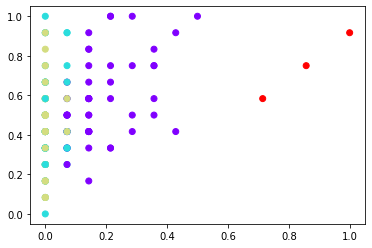

In [ ]:
data_with_clusters = X.copy()
data_with_clusters['Clusters'] = identified_clusters 
data_with_clusters
plt.scatter(data_with_clusters['goals'],data_with_clusters['match_played'],c=data_with_clusters['Clusters'],cmap='rainbow')

K-Means model with two clusters 

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0) 

kmeans.fit(X)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


KMeans(n_clusters=2, random_state=0)

Finding the centroid:

The KMeans algorithm clusters data by trying to separate samples in n groups of equal variances, minimizing a criterion known as inertia, or within-cluster sum-of-squares Inertia, or the within-cluster sum of squares criterion, can be recognized as a measure of how internally coherent clusters are.
The k-means algorithm divides a set of N samples X into K disjoint clusters C, each described by the mean j of the samples in the cluster. The means are commonly called the cluster centroids.
The K-means algorithm aims to choose centroids that minimize the inertia, or within-cluster sum of squared criterion.

In [ ]:
kmeans.cluster_centers_

array([[0.95934959, 0.57317073, 0.00696864, 0.04878049, 0.03963415,
        0.07859079, 0.00813008, 0.07442151, 0.04336043, 0.01355014,
        0.43699187],
       [0.32152778, 0.73333333, 0.20833333, 0.16969697, 0.18333333,
        0.17222222, 0.05      , 0.27307692, 0.12222222, 0.17222222,
        0.58888889]])

In [ ]:
kmeans.inertia_

66.07419304237598

Inertia is not a normalized metric.

The lower values of inertia are better and zero is optimal.

But in very high-dimensional spaces, euclidean distances tend to become inflated (this is an instance of curse of dimensionality).

Running a dimensionality reduction algorithm such as PCA prior to k-means clustering can alleviate this problem and speed up the computations.

The lesser the model inertia, the better the model fit.
We can see that the model has very high inertia. So, this is not a good model fit to the data.

**Check quality of weak classification by the model**

---



In [ ]:
labels = kmeans.labels_

# check how many of the samples were correctly labeled
correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

Result: 64 out of 183 samples were correctly labeled.


In [ ]:
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Accuracy score: 0.35


We have achieved a weak classification accuracy of 33% by our unsupervised model.


Use elbow method to find optimal number of clusters
---



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.

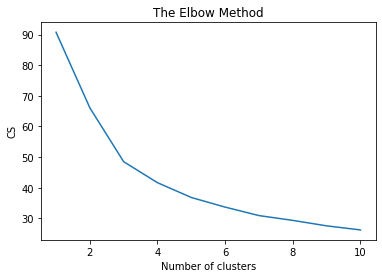

In [ ]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

There is a kink at k=3. Therefore the optimum cluster should be 3.


---



**Let's try with K=3**

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3,random_state=0)

kmeans.fit(X)

labels = kmeans.labels_

# check how many of the samples were correctly labeled

correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 126 out of 183 samples were correctly labeled.
Accuracy score: 0.69


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


**let's try with higher cluster:**

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5,random_state=0)

kmeans.fit(X)

labels = kmeans.labels_

# check how many of the samples were correctly labeled

correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 32 out of 183 samples were correctly labeled.
Accuracy score: 0.17


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=6,random_state=0)

kmeans.fit(X)

labels = kmeans.labels_

# check how many of the samples were correctly labeled

correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 82 out of 183 samples were correctly labeled.
Accuracy score: 0.45


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4,random_state=0)

kmeans.fit(X)

labels = kmeans.labels_

# check how many of the samples were correctly labeled

correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 127 out of 183 samples were correctly labeled.
Accuracy score: 0.69


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=7,random_state=0)

kmeans.fit(X)

labels = kmeans.labels_

# check how many of the samples were correctly labeled

correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 9 out of 183 samples were correctly labeled.
Accuracy score: 0.05


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=8,random_state=0)

kmeans.fit(X)

labels = kmeans.labels_

# check how many of the samples were correctly labeled

correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 52 out of 183 samples were correctly labeled.
Accuracy score: 0.28


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


This shows: k = 3 & 4 gives the highest accuracy of 69%.





---



---



K-Means Visualization:

In [ ]:
from sklearn.cluster import KMeans
 
#Initialize the class object
kmeans = KMeans(n_clusters= 10)
 
#predict the labels of clusters.
label = kmeans.fit_predict(X)
 
print(label)

[9 6 6 7 2 2 2 2 2 2 7 2 2 2 7 3 3 4 2 2 2 2 4 8 8 3 3 2 8 3 3 3 3 3 4 4 8
 3 7 2 8 3 4 4 8 8 3 3 1 3 4 8 3 3 3 8 8 8 8 3 3 8 3 8 3 3 8 3 8 8 1 1 5 0
 0 1 5 1 0 5 0 1 5 5 1 1 0 5 0 0 0 0 0 1 5 0 0 1 1 0 0 5 1 0 0 1 5 0 1 5 0
 1 0 0 5 5 5 1 5 0 5 5 0 0 0 5 0 5 0 0 1 0 0 0 0 5 1 0 0 5 0 1 0 0 0 0 0 0
 5 0 0 0 1 5 1 1 1 0 0 1 5 1 1 5 0 5 5 1 5 5 0 1 1 0 5 0 1 0 5 5 5 1 1]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


In [ ]:
X.head()

,serial,position,goals,right_foot,left_foot,headers,others,inside_area,outside_areas,penalties,match_played
0,0.000000,0.5,1.000000,1.000000,0.125,1.000000,0.0,1.000000,0.666667,1.000000,0.916667
1,0.013889,0.5,0.857143,0.727273,0.375,0.333333,1.0,1.000000,0.000000,1.000000,0.750000
2,0.027778,0.5,0.714286,0.272727,0.500,1.000000,1.0,0.846154,0.000000,0.333333,0.583333
3,0.041667,0.5,0.500000,0.000000,1.000,0.000000,0.0,0.538462,0.333333,0.333333,1.000000
4,0.055556,1.0,0.428571,0.272727,0.125,1.000000,0.0,0.538462,0.000000,0.000000,0.416667


In [ ]:
y = X.head(100)
kmeans = KMeans(8)
kmeans.fit(X)
identified_clusters1 = kmeans.fit_predict(X)
identified_clusters1

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


array([0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 1, 7, 4, 4, 4, 4,
       7, 7, 7, 1, 1, 4, 7, 1, 1, 1, 1, 1, 1, 1, 7, 1, 1, 1, 7, 1, 7, 7,
       7, 7, 1, 1, 3, 1, 7, 7, 1, 1, 1, 7, 6, 7, 7, 1, 1, 7, 1, 7, 1, 1,
       7, 1, 7, 6, 3, 3, 5, 2, 6, 3, 5, 3, 6, 5, 6, 3, 5, 5, 3, 3, 2, 5,
       2, 2, 2, 2, 2, 3, 5, 2, 2, 3, 3, 2, 2, 5, 3, 2, 2, 3, 5, 2, 3, 5,
       2, 3, 2, 2, 5, 5, 5, 3, 5, 2, 5, 5, 6, 6, 6, 5, 2, 5, 2, 2, 3, 2,
       6, 6, 2, 5, 3, 2, 2, 5, 2, 3, 2, 2, 2, 2, 2, 2, 5, 2, 2, 2, 3, 5,
       3, 3, 3, 2, 2, 3, 5, 3, 3, 5, 2, 5, 5, 3, 5, 5, 2, 3, 3, 2, 5, 2,
       3, 2, 5, 5, 5, 3, 3], dtype=int32)

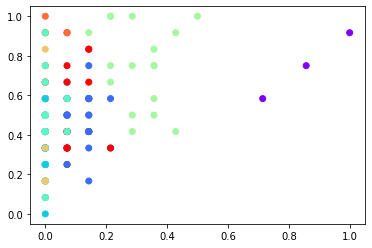

In [ ]:
data_with_clusters = X.copy()
data_with_clusters['Clusters'] = identified_clusters1 
data_with_clusters
plt.scatter(data_with_clusters['goals'],data_with_clusters['match_played'],c=data_with_clusters['Clusters'],cmap='rainbow')